<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/fish_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Demo

From 2000 to 2010, the NOAA Northwest Fisheries Science Center kept data on Sockeye salmon growth in Redfish Lake, Idaho. More on the data [here](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&CycleBeginYear=2017).

Do fish height and weight follow a Bivariate Normal distribution? We'll look at fish with a 3 year old maturity.

In [1]:
!pip install symbulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 811.3 kB/s eta 0:00:00


In [38]:
from symbulate import *
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [4]:
fish = pd.read_csv("https://mshsu.github.io/probasets/data/Fish.csv", encoding = 'unicode_escape')
fish

,Individual,Species,Disp,Dispyr,Dispsex,Tag Code,Spawner Id,Spawner Lg (Mm),Spawner Wt (G),Rearing,...,4yo Maturity Sorta Pool,4yo Maturity Sorta Tote,4yo Maturity Sorta Comment,4yo Maturity Sortb Date,4yo Maturity Sortb Sex,4yo Maturity Sortb Tote,Record Number,Accessed Date,Source Url,Preferred Citation
0,OneNOAA14BCB_0110,15.0,3yo Spawner,2017.0,male,3DD.007780DC05,M17,514.0,1525.0,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,Row 1 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
1,OneNOAA14BCB_0111,15.0,4yo spawner,2018.0,male,3DD.007781347D,NaN,610.0,2852.0,SW,...,27.0,aft2,NaN,NaN,NaN,NaN,Row 2 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
2,OneNOAA14BCB_0112,15.0,3yo Redfish Lake Release,2017.0,female,3DD.007780BAC8,2ND RELEASE,NaN,NaN,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,Row 3 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
3,OneNOAA14BCB_0113,15.0,3yo SPAWNER,2017.0,female,3DD.007781C4D6,F26,462.0,1290.0,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,Row 4 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
4,OneNOAA14BCB_0114,15.0,4YO PETTIT LAKE RELEASE,2018.0,MALE,3DD.0077800BF2,NaN,NaN,NaN,SW,...,27.0,mid2,NaN,NaN,NaN,NaN,Row 5 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,OneNOAA14BCB_1132,15.0,Immature,2018.0,NaN,3DD.007780619B,NaN,NaN,NaN,SW,...,27.0,NaN,NaN,2018-08-09 00:00:00,imm,NaN,Row 1349 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
1349,OneNOAA14BCB_1350,15.0,4yo spawner,2018.0,male,3DD.0077810648,NaN,665.0,4520.0,SW,...,26.0,mid,NaN,NaN,NaN,NaN,Row 1350 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
1350,OneNOAA14BCB_1351,15.0,3yo Redfish Lake Release,2017.0,female,3DD.00778D997C,NaN,NaN,NaN,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,Row 1351 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."
1351,OneNOAA14BCB_1352,15.0,3yo Redfish Lake Release,2017.0,female,3DD.007780F782,NaN,NaN,NaN,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,Row 1352 of 1353,Accessed on 2023-05-13 00:09:07,https://www.webapps.nwfsc.noaa.gov/apex/parrda...,"Frost, Deborah; 05/30/2019. NOAA Fisheries Nor..."


<Axes: xlabel='3yo Maturity Sorta Length', ylabel='3yo Maturity Sorta Weight'>

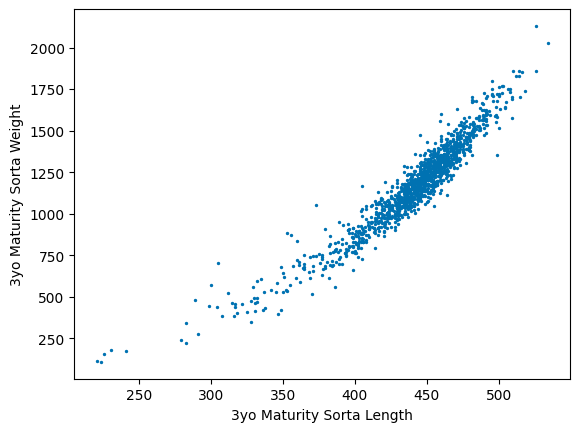

In [84]:
fish_small = fish[['3yo Maturity Sorta Length', '3yo Maturity Sorta Weight']]
fish_small.plot.scatter('3yo Maturity Sorta Length',
                        '3yo Maturity Sorta Weight',
                        s=2)

## Marginal Distributions

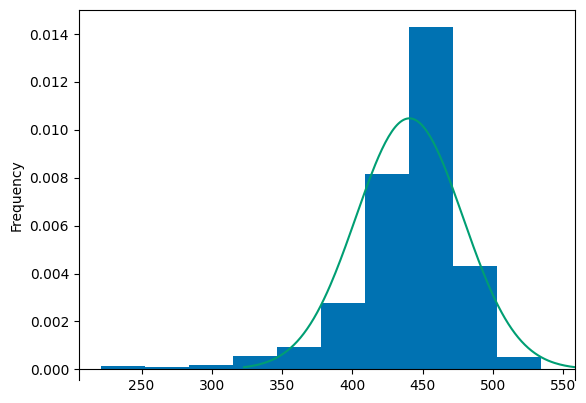

In [34]:
fish_small['3yo Maturity Sorta Length'].plot.hist(density=True)

xbar1 = fish_small['3yo Maturity Sorta Length'].mean()
s1 = fish_small['3yo Maturity Sorta Length'].std()
Normal(xbar1, s1).plot()

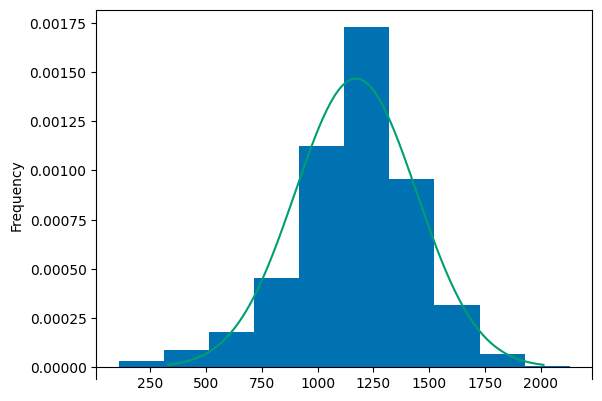

In [35]:
fish_small['3yo Maturity Sorta Weight'].plot.hist(density=True)

xbar2 = fish_small['3yo Maturity Sorta Weight'].mean()
s2 = fish_small['3yo Maturity Sorta Weight'].std()
Normal(xbar2, s2).plot()

## Joint Distribution

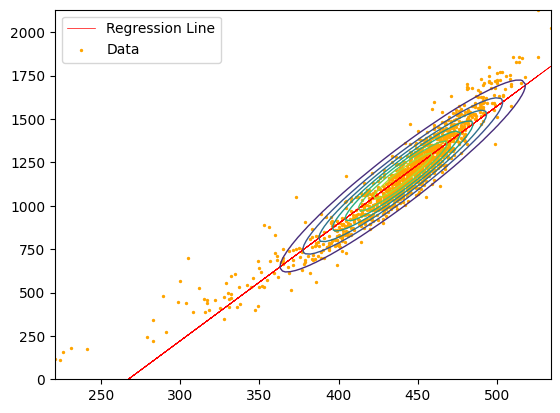

In [94]:
# TODO: Convert contour plot to symbulate heatmap once symbulate heatmap
#   colormap has been changed to viridis.

# define obs
fish_small2 = fish_small.dropna()
x_obs = fish_small2['3yo Maturity Sorta Length']
y_obs = fish_small2['3yo Maturity Sorta Weight']

# define the mean and covariance matrix of the bivariate normal distribution
mean = [xbar1, xbar2]
cov = np.matrix(fish_small.cov())

# create a meshgrid of x and y values
x, y = np.meshgrid(np.linspace(x_obs.min(), x_obs.max(), 100), 
                   np.linspace(0, y_obs.max(), 100))

# calculate the PDF values at each point on the meshgrid
pos = np.dstack((x, y))
z = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov))) * \
                  np.exp(-0.5 * np.dot(np.dot((pos[i, j] - mean), np.linalg.inv(cov)), (pos[i, j] - mean).T))
        if z[i, j] == 0:
            z[i, j] = np.nan

# create linear model
reg = LinearRegression()
reg.fit(x_obs.values.reshape(-1, 1), y_obs)
y_pred = reg.predict(x_obs.values.reshape(-1, 1))

# add regression line
# fig = plt.gca().set_facecolor('black')
plt.plot(x_obs, y_pred, color='red', label='Regression Line', lw=0.5)

# create a heatmap of the PDF values
# bvn = plt.pcolormesh(x, y, z, shading='auto', cmap='viridis')
plt.contour(x, y, z, linewidths=1)
# cbar = plt.colorbar(bvn)
# cbar.set_label('BivNorm Density')

# add data
plt.scatter(x_obs, y_obs, color="orange", label='Data',
            s=2)

# display the plot
plt.ylim(0, None)
plt.legend()
plt.show()

## Descriptive Statistics

In [22]:
r = fish_small[['3yo Maturity Sorta Length', '3yo Maturity Sorta Weight']].corr().iloc[0,1]
print("3yo Maturity Length: mean = %.5g mm   sd = %.5g mm" % (xbar1, s1))
print("3yo Maturity Weight: mean = %.5g g    sd = %.5g g " % (xbar2, s2))
print("                     cov  = %.5g    corr = %.4g" % (cov[0,1], r))

3yo Maturity Length: mean = 440.54 mm   sd = 38.067 mm
3yo Maturity Weight: mean = 1171.6 g    sd = 272.04 g 
                     cov  = 9801.5    corr = 0.9465


*Source: Frost, Deborah; 05/30/2019. NOAA Fisheries Northwest Fisheries Science Center. Growth data: Redfish_Lake_growth_data (https://www.webapps.nwfsc.noaa.gov/apex/parrdata/inventory/tables/table/redfish_lake_growth_data)*